In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D

sns.set(font_scale=1.0)
plt.style.use("seaborn-whitegrid")

In [27]:
data1 = pd.read_feather("policy1")
data2 = pd.read_feather("policy2")
input_vars1 = pd.read_csv("input_parameters1.csv")
input_vars2 = pd.read_csv("input_parameters2.csv")

data2.o0 = data2.o0+(len(input_vars1))

data = pd.concat([data1,data2],axis=0).reset_index()
input_vars = pd.concat([input_vars1,input_vars2],axis=0).reset_index()

     Unnamed: 0  capacity_policy  minfood_access_policy  ration_size_policy  \
180         180              1.0                    0.0                30.0   
181         181              1.0                    0.0                30.0   
182         182              1.0                    0.0                30.0   
183         183              1.0                    0.0                30.0   
228         228              1.0                    0.0                30.0   
229         229              1.0                    0.0                30.0   
230         230              1.0                    0.0                30.0   
231         231              1.0                    0.0                30.0   
276         276              1.0                    0.0                30.0   
277         277              1.0                    0.0                30.0   
278         278              1.0                    0.0                30.0   
279         279              1.0                    

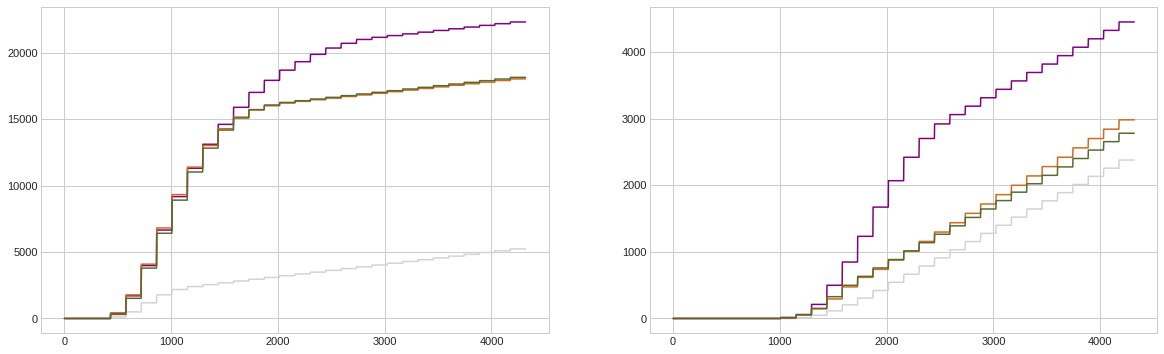

In [75]:
fig, ax = plt.subplots(1,2,figsize=(20,6))

tmp = input_vars1[input_vars1.beta==1.0]
tmp = tmp[tmp.epsilon==1.0]
tmp = tmp[tmp.parallel_served_full==7.8]

tmp = tmp[tmp.ration_size_policy==30]
tmp = tmp[tmp.capacity_policy==1.0]

print(tmp)
for j in tmp.index:
    if tmp.gamma[j]==3.0:
        ax[0].plot( x, data.o1[data.o0==j],color=my_palette[tmp.rerouting_policy[j]])
    elif tmp.gamma[j]==7.0:
        ax[1].plot( x, data.o1[data.o0==j],color=my_palette[tmp.rerouting_policy[j]])

In [29]:
def normalise(arr):
    arrmax = np.max(arr)
    arrmin = np.min(arr)
    
    arrnorm = (arr - arrmin) / (arrmax - arrmin)
    
    return arrnorm

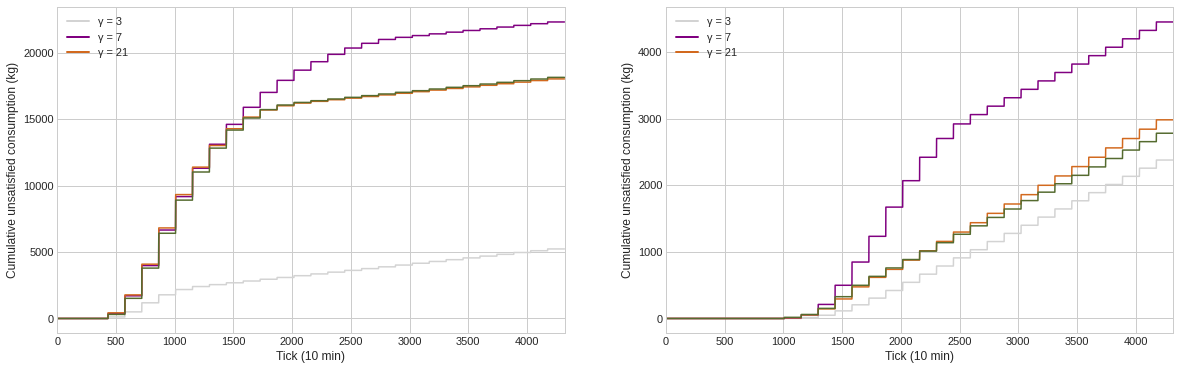

In [68]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
           
# x vector to plot            
x = np.linspace(0,4319,4320) 
colors = ['lightgrey','purple', 'chocolate', 'darkolivegreen']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['γ = 3', 'γ = 7', 'γ = 21']

# Zoom for 2nd graph
# ax[1].set_ylim([-100,30000])
# ax[0].set_ylim([-100,100000])

# graph layout
# plt.title("")
tmp = input_vars[input_vars.beta==1.0]
tmp = tmp[tmp.epsilon==1.0]
tmp = tmp[tmp.parallel_served_full==7.8]

tmp = tmp[tmp.ration_size_policy==30]
tmp = tmp[tmp.capacity_policy==1.0]

my_palette = {}
my_palette[15] = 'red'
my_palette[30] = 'blue'

for i in range(4):
    my_palette[i] = colors[i]


for j in tmp.index:
    if tmp.gamma[j]==3.0:
        ax[0].plot( x, data.o1[data.o0==j],color=my_palette[tmp.rerouting_policy[j]])
    elif tmp.gamma[j]==7.0:
        ax[1].plot( x, data.o1[data.o0==j],color=my_palette[tmp.rerouting_policy[j]])

for a in ax:
    a.set_ylabel("Cumulative unsatisfied consumption (kg)")
    a.set_xlabel("Tick (10 min)")
    a.set_xlim([0,4320])
    a.legend(lines, labels)

# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")

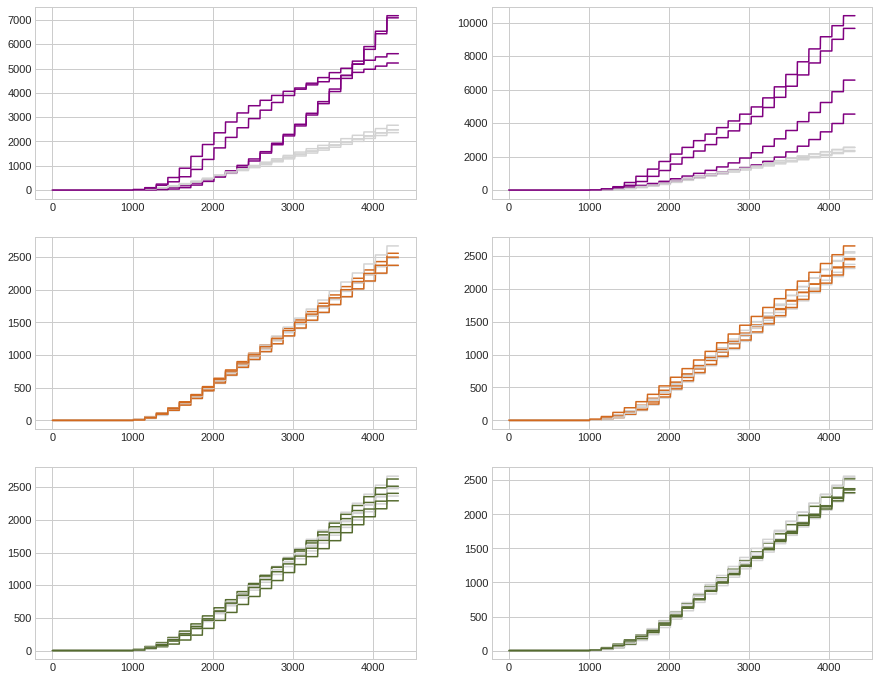

In [19]:
# x vector to plot            
x = np.linspace(0,4319,4320) 

fig, ax = plt.subplots(3,2,figsize=(15,12))
        


# lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
# labels = ['γ = 3', 'γ = 7', 'γ = 21']

# Zoom for 2nd graph
# ax[1].set_ylim([-100,8000])
# ax[0].set_ylim([-100,100000])

# graph layout
# plt.title("")

# colors = {}
# colors[0] = ['chocolate','orange','lightgrey']
# colors[1] = ['purple','plum','lightgrey']
# colors[2] = ['darkolivegreen','yellowgreen','lightgrey']

for i in range(1,4):
    for j in d[1]:
        if input_vars.capacity_policy[j] == 0.0 and input_vars.ration_size_policy[j] == 30:
            if input_vars.rerouting_policy[j] == i:
                ax[i-1,0].plot( x, data.o1[data.o0==j],color=colors[int(input_vars.rerouting_policy[j])])
            if input_vars.rerouting_policy[j] == 0:
                ax[i-1,0].plot( x, data.o1[data.o0==j],color=colors[0])
        elif input_vars.capacity_policy[j] == 0.0 and input_vars.ration_size_policy[j] == 15:
            if input_vars.rerouting_policy[j] == i:
                ax[i-1,1].plot( x, data.o1[data.o0==j],color=colors[int(input_vars.rerouting_policy[j])])
            if input_vars.rerouting_policy[j] == 0:
                ax[i-1,1].plot( x, data.o1[data.o0==j],color=colors[0])


# for a in ax:
#     a.set_ylabel("Cumulative unsatisfied consumption (kg)")
#     a.set_xlabel("Tick (10 min)")
#     a.set_xlim([0,4320])
#     a.legend(lines, labels)

# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")

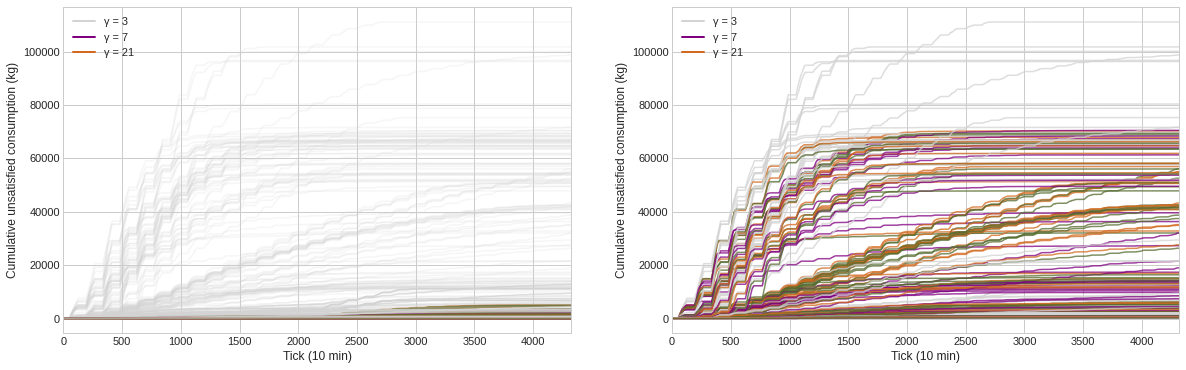

In [69]:
# dict to store relevant indices
d = {}
d[0] = input_vars[input_vars.gamma==3].index
d[1] = input_vars[input_vars.gamma==7].index
d[2] = input_vars[input_vars.gamma==14].index

fig, ax = plt.subplots(1,2,figsize=(20,6))
           
# x vector to plot            
x = np.linspace(0,4319,4320) 
colors = ['lightgrey','purple', 'chocolate', 'darkolivegreen']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['γ = 3', 'γ = 7', 'γ = 21']

# Zoom for 2nd graph
# ax[1].set_ylim([-100,30000])
# ax[0].set_ylim([-100,100000])

# graph layout
# plt.title("")

for i in d:    
    for j in d[i]:
        if input_vars.ration_size_policy[j] == 30:
            ax[0].plot( x, data.o2[data.o0==j],color='lightgrey', alpha=0.2)
            ax[1].plot( x, data.o2[data.o0==j],color=colors[int(input_vars.rerouting_policy[j])], alpha=.75)
            
        else:
            ax[0].plot( x, data.o2[data.o0==j],color=colors[int(input_vars.rerouting_policy[j])], alpha=.75)
            ax[1].plot( x, data.o2[data.o0==j],color='lightgrey', alpha=.75)
        
for a in ax:
    a.set_ylabel("Cumulative unsatisfied consumption (kg)")
    a.set_xlabel("Tick (10 min)")
    a.set_xlim([0,4320])
    a.legend(lines, labels)

# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")

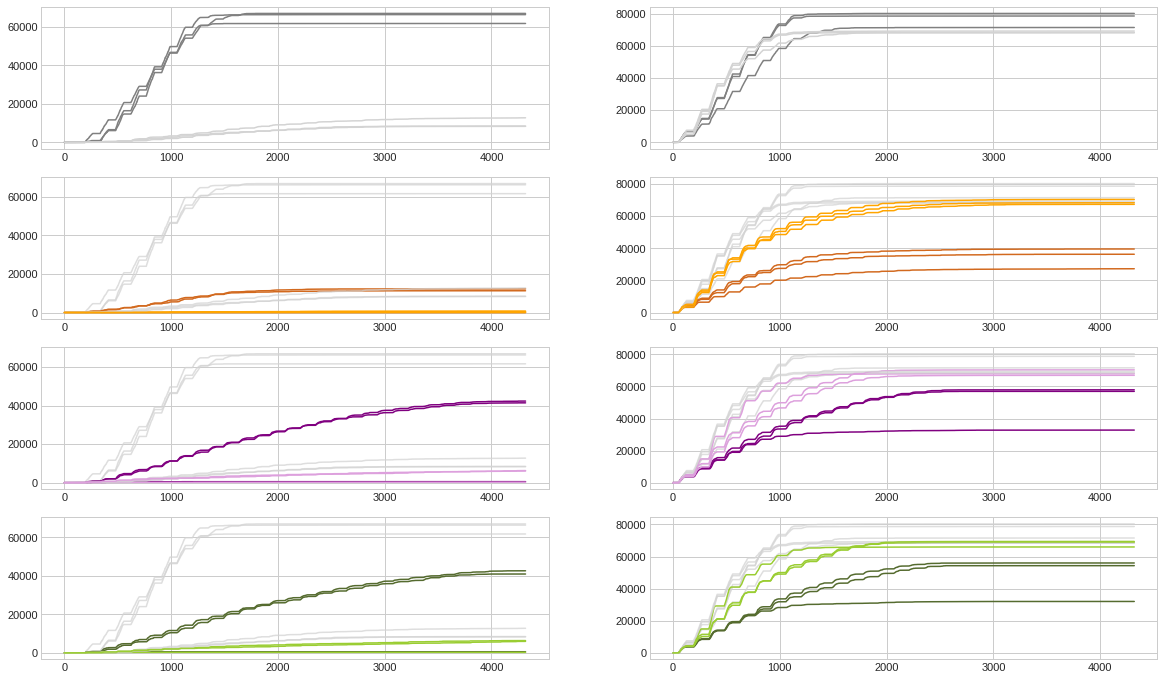

In [63]:
# x vector to plot            
x = np.linspace(0,4319,4320) 

fig, ax = plt.subplots(4,2,figsize=(20,12))
        
from matplotlib.lines import Line2D

lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['γ = 3', 'γ = 7', 'γ = 21']

# dict to store relevant indices
d = {}
d[0] = input_vars[input_vars.epsilon==0.1].index
d[1] = input_vars[input_vars.epsilon==1].index
# d[2] = input_vars[input_vars.gamma==14].index

colors = {}
colors[0] = ['grey','lightgrey']
colors[1] = ['chocolate','orange','lightgrey']
colors[2] = ['purple','plum','lightgrey']
colors[3] = ['darkolivegreen','yellowgreen','lightgrey']

for i in d:

    for j in d[i]: 
        
        if input_vars.ration_size_policy[j] == 30:        
            
            ind = int(input_vars.rerouting_policy[j])
            indv = int(input_vars.gamma[j])
            indvv = int(input_vars.beta[j]) #np.round(int(input_vars.epsilon[j]))

            if indv==3:
                if input_vars.rerouting_policy[j] == 0:
                    for indd in range(1,4):
                        ax[indd,i].plot( x, data.o2[data.o0==j],color='lightgrey',alpha=0.75)
                ax[ind,i].plot( x, data.o2[data.o0==j],color=colors[ind][indvv])


# a.set_ylabel("Cumulative unsatisfied consumption (kg)")
# a.set_xlabel("Tick (10 min)")
# a.set_xlim([0,4320])
# a.legend(lines, labels)

# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")

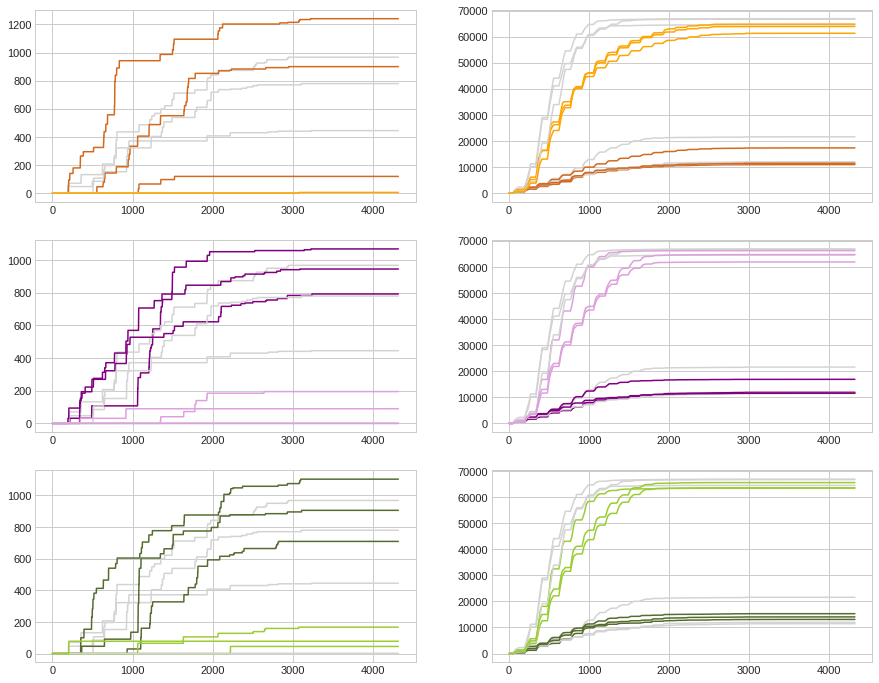

In [54]:
fig, ax = plt.subplots(3,2,figsize=(15,12))

for i in d:

    for j in d[i]: 
        
        if input_vars.ration_size_policy[j] == 30:        
            
            ind = int(input_vars.rerouting_policy[j])
            indv = int(input_vars.gamma[j])
            indvv = int(input_vars.beta[j]) #np.round(int(input_vars.epsilon[j]))

            if ind != 0 and indv==7:
                ax[ind-1,i].plot( x, data.o2[data.o0==j],color=colors[int(ind-1)][indvv])
            if ind == 0 and indv==7:
                for indd in range(3):
                    ax[indd,i].plot( x, data.o2[data.o0==j],color='lightgrey')

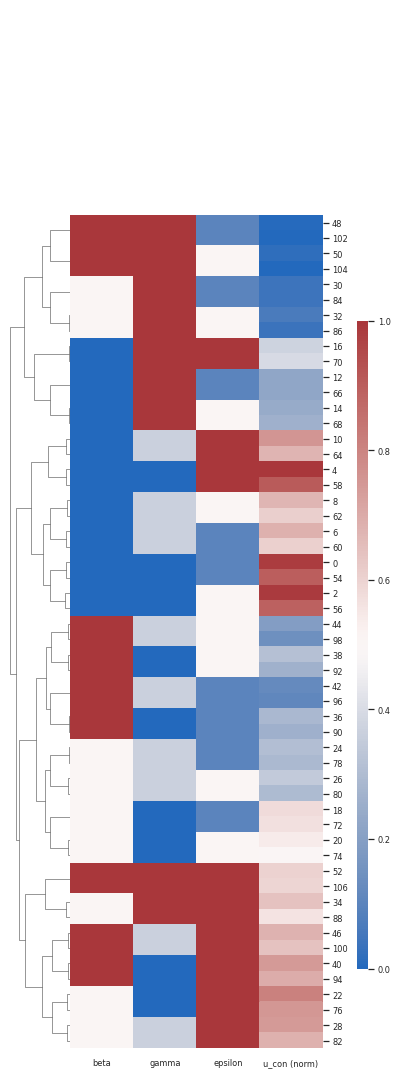

In [136]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["u_con (norm)"] = list()
for j in input_vars.index:#d[0]:
    uc_endvals_dict["u_con (norm)"].append(dat a.o2[data.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = input_vars.reset_index()#.iloc[ d[0] ].reset_index()
filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==6.0]

# filtered_input_vars = filtered_input_vars.drop(columns=["gamma"])# = 0#filtered_input_vars["gamma"]/30


filtered_input_vars["u_con (norm)"] = normalise(filtered_input_vars["u_con (norm)"]) 
filtered_input_vars["gamma"] = normalise(filtered_input_vars["gamma"])

# filtered_input_vars["parallel_served_full"] = normalise(filtered_input_vars["parallel_served_full"]) 
# filtered_input_vars["beta"] = np.abs(filtered_input_vars["beta"]-1)


import seaborn as sns
sns.set(font_scale=0.75)
fig = sns.clustermap(filtered_input_vars.iloc[:,[8,9,10,13]],cbar_pos=(1.0, .1, .03, .6),figsize=(5,15),col_cluster=False,cmap='vlag')
# fig.savefig("/home/daan/Desktop/clustermap_unsatisfiedconsumption.png")

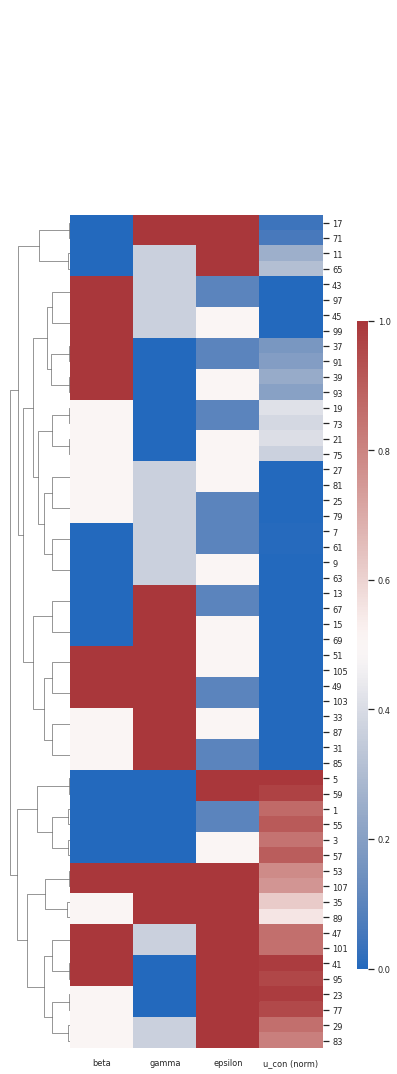

In [137]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["u_con (norm)"] = list()
for j in input_vars.index:#d[0]:
    uc_endvals_dict["u_con (norm)"].append(data.o2[data.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = input_vars.reset_index()#.iloc[ d[0] ].reset_index()
filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==7.8]

# filtered_input_vars = filtered_input_vars.drop(columns=["gamma"])# = 0#filtered_input_vars["gamma"]/30


filtered_input_vars["u_con (norm)"] = normalise(filtered_input_vars["u_con (norm)"]) 
filtered_input_vars["gamma"] = normalise(filtered_input_vars["gamma"])

# filtered_input_vars["parallel_served_full"] = normalise(filtered_input_vars["parallel_served_full"]) 
# filtered_input_vars["beta"] = np.abs(filtered_input_vars["beta"]-1)


import seaborn as sns
sns.set(font_scale=0.75)
fig = sns.clustermap(filtered_input_vars.iloc[:,[8,9,10,13]],cbar_pos=(1.0, .1, .03, .6),figsize=(5,15),col_cluster=False,cmap='vlag')
# fig.savefig("/home/daan/Desktop/clustermap_unsatisfiedconsumption.png")

Alle input waarden zijn aanwezig in de set van gamma=7 (paars) en gamma=21 (oranje)

In principe doet gamma=21 het beter met lagere extreme waarde dan gamma=7. Welke combinatie van waarden brengt 21 en 7 naar elkaar toe? 

alpha: 0 and 0.5 present in orange and puprle gamma zones

epsilon 0,0.5,1.0 min of meer gelijk verdeeld over oranje en paarse gamma zones

beta = 1,0.5 allemaal in oranje -> drukker netwerk 

one run beta=0 with gamma=21

Gamma = 7 paars, gamma=21 oranje. alpha vars altijd 0 of 0.5 

## Queuing

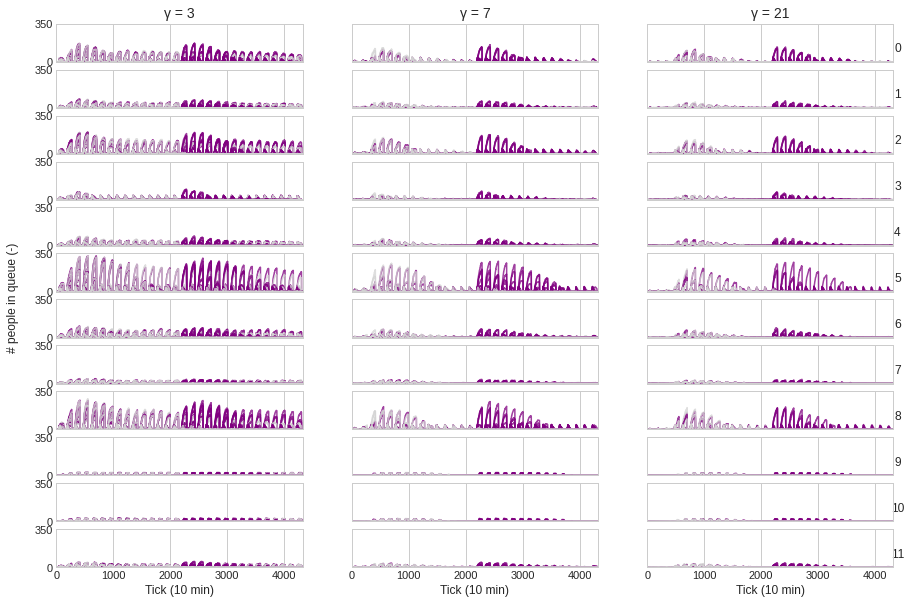

In [70]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.0)
plt.style.use("seaborn-whitegrid")

# Data
# dict to store relevant indices
d = {}
d[0] = input_vars[input_vars.gamma==3].index
d[1] = input_vars[input_vars.gamma==7].index
d[2] = input_vars[input_vars.gamma==14].index

colors = {}
colors[30] = ['lightgrey','lightgrey']
colors[1] = ['chocolate','orange','lightgrey']
colors[15] = ['purple','plum','lightgrey']
colors[3] = ['darkolivegreen','yellowgreen','lightgrey']

nb_facs = 12
nb_clusters = 3
fig, ax  = plt.subplots(nb_facs, nb_clusters,sharex=True, sharey=True,figsize=(15,10))

for c in range(nb_clusters):
    for i in d[c]:
        
        ind = int(input_vars.ration_size_policy[i])
        

        for f in range(nb_facs):
            ax[f,c].plot(x,data[data.o0==i].iloc[:,f+4],colors[ind][0],alpha=0.75)
            ax[f,c].set_xlim([0,4320])
            ax[f,c].set_ylim([0,350])
            ax[f,2].yaxis.set_label_position("right")
            ax[f,2].set_ylabel(f,rotation='horizontal',fontsize=12)
            ax[f,c].set_yticks([0,350])

            
    ax[0,c].set_title(labels[c],fontsize=14)
    ax[11,c].set_xlabel("Tick (10 min)")

fig.text(0.085, 0.5, '# people in queue (-)', va='center', ha='center', rotation='vertical',fontsize=12)
# fig.text(0.5, 0.91, 'Number of people queueing; categorised per cluster, day 0-30', va='center', ha='center', rotation='horizontal',fontsize=16)

# fig.savefig("/home/daan/Desktop/allqueues_clustered.png")

plt.show()

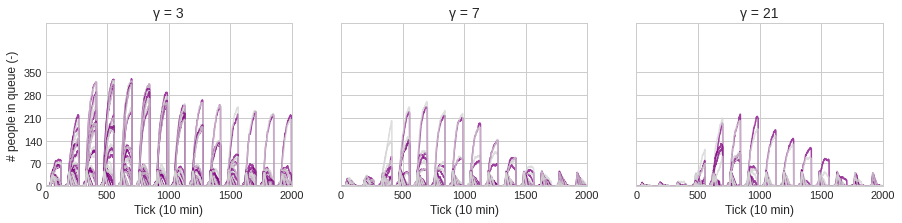

In [73]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

nb_facs = 1
nb_clusters = 3
fig, ax  = plt.subplots(nb_facs, nb_clusters,sharex=True, sharey=True,figsize=(15,3))#,gridspec_kw={'width_ratios': width_ratios})
f=5
for c in range(nb_clusters):
    for i in d[c]:
        
        
        ind = int(input_vars.ration_size_policy[i])

        if input_vars.parallel_served_full[i] == 7.8:


            ax[c].plot(x,data[data.o0==i].iloc[:,f+4],colors[ind][0],alpha=0.75)
            ax[c].set_xlim([0,2000])
            ax[c].set_ylim([0,500])
    #         ax[0].set_ylabel("$\mathit{Fac %s}$"%f,rotation='horizontal',fontsize=12)
            ax[c].set_yticks([0,70,140,210,280,350])
            ax[c].set_title(labels[c],fontsize=14)
    ax[c].set_xlabel("Tick (10 min)")

fig.text(0.095, 0.5, '# people in queue (-)', va='center', ha='center', rotation='vertical',fontsize=12)
# fig.text(0.5, 0.91, 'Number of people queueing; categorised per cluster, day 0-30', va='center', ha='center', rotation='horizontal',fontsize=16)

# fig.savefig("/home/daan/Desktop/fac5queue_clustered.png")

plt.show()

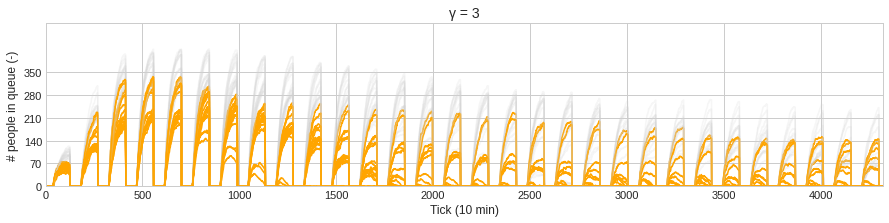

In [144]:
nb_facs = 1
nb_clusters = 1
fig, ax  = plt.subplots(nb_facs, nb_clusters,sharex=True, sharey=True,figsize=(15,3))#,gridspec_kw={'width_ratios': width_ratios})
f=6
for c in range(nb_clusters):
    for i in d[c]:
        if input_vars.parallel_served_full[i] == 6.0:
            ax.plot(x,data[data.o0==i].iloc[:,f+3],color='lightgrey',alpha=0.2)
        else:
            ax.plot(x,data[data.o0==i].iloc[:,f+3],color='orange')

        ax.set_xlim([0,4320])
        ax.set_ylim([0,500])
#         ax[0].set_ylabel("$\mathit{Fac %s}$"%f,rotation='horizontal',fontsize=12)
        ax.set_yticks([0,70,140,210,280,350])
        ax.set_title(labels[c],fontsize=14)
    ax.set_xlabel("Tick (10 min)")

fig.text(0.095, 0.5, '# people in queue (-)', va='center', ha='center', rotation='vertical',fontsize=12)
# fig.text(0.5, 0.91, 'Number of people queueing; categorised per cluster, day 0-30', va='center', ha='center', rotation='horizontal',fontsize=16)

# fig.savefig("/home/daan/Desktop/fac5queue_clustered.png")

plt.show()

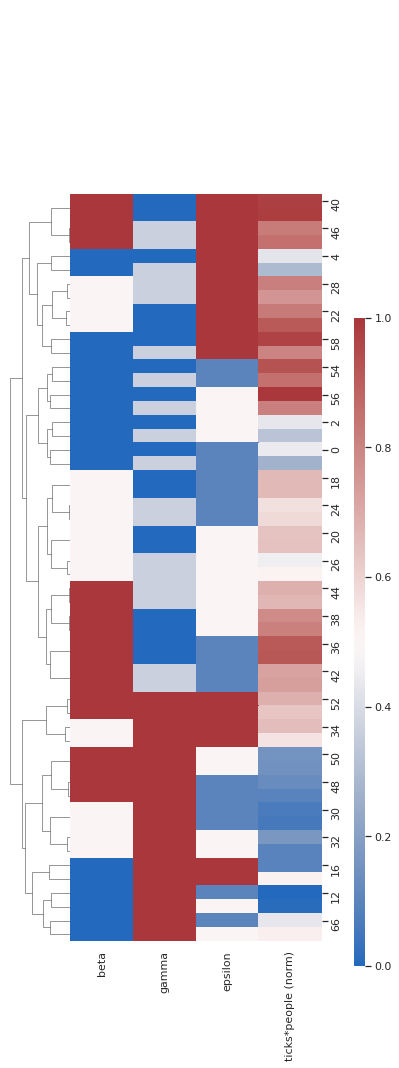

In [153]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["ticks*people (norm)"] = list()
for j in input_vars.index:#d[0]:
    uc_endvals_dict["ticks*people (norm)"].append( np.sum(data.o9[data.o0==j]))
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = input_vars.reset_index()#.iloc[ d[0] ].reset_index()
filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==6.0]

# filtered_input_vars = filtered_input_vars.drop(columns=["gamma"])# = 0#filtered_input_vars["gamma"]/30


filtered_input_vars["ticks*people (norm)"] = normalise(filtered_input_vars["ticks*people (norm)"]) 
filtered_input_vars["gamma"] = normalise(filtered_input_vars["gamma"])

sns.set(font_scale=1.0)
fig = sns.clustermap(filtered_input_vars.iloc[:,[8,9,10,13]],cbar_pos=(1.0, .1, .03, .6),figsize=(5,15),col_cluster=False,cmap='vlag')
# fig.savefig("/home/daan/Desktop/clustermap_unsatisfiedconsumption.png")

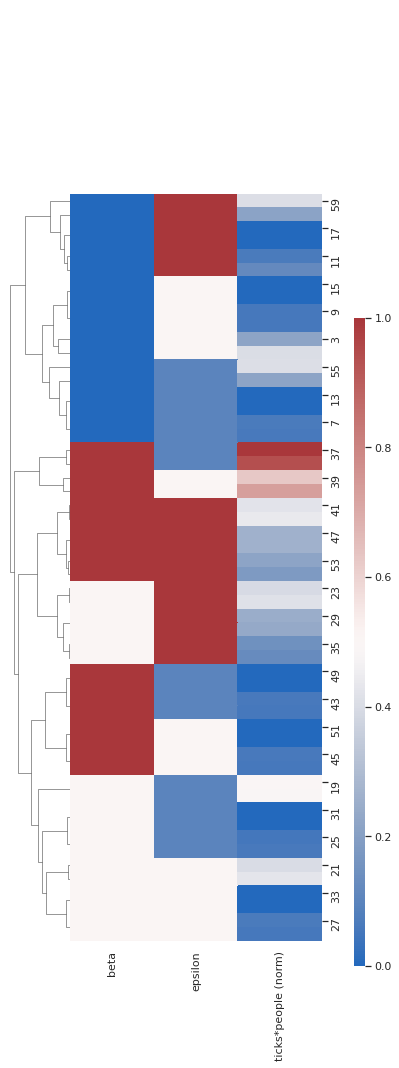

In [152]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["ticks*people (norm)"] = list()
for j in input_vars.index:#d[0]:
    uc_endvals_dict["ticks*people (norm)"].append( np.sum(data.o9[data.o0==j]))
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = input_vars.reset_index()#.iloc[ d[0] ].reset_index()
filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==7.8]

# filtered_input_vars = filtered_input_vars.drop(columns=["gamma"])# = 0#filtered_input_vars["gamma"]/30


filtered_input_vars["ticks*people (norm)"] = normalise(filtered_input_vars["ticks*people (norm)"]) 
filtered_input_vars["gamma"] = normalise(filtered_input_vars["gamma"])

sns.set(font_scale=1.0)
fig = sns.clustermap(filtered_input_vars.iloc[:,[8,9,10,13]],cbar_pos=(1.0, .1, .03, .6),figsize=(5,15),col_cluster=False,cmap='vlag')
# fig.savefig("/home/daan/Desktop/clustermap_unsatisfiedconsumption.png")